In [55]:
#Importamos la librerias
import pandas as pd
import numpy as np
import os
#Gráficas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [56]:
#Seteamos el path de los datos
PATH_INPUT_DATA = os.path.join('../Primera entrega','csv_proyectoFinal.csv')#Recordar adaptar según el path del repositorio
file="csv_proyectoFinal.csv"

#Setting TARIFF.CODE datatype as str, to avoid losing information
dtype={'TARIFF.CODE':'str'}
df_original = pd.read_csv(PATH_INPUT_DATA, sep=";", dtype=dtype)

In [5]:
df_original.head()

,year,month,day,OFFICE,IMPORTER.TIN,TARIFF.CODE,ORIGIN.CODE,CIF_USD_EQUIVALENT,QUANTITY,GROSS.WEIGHT,TOTAL.TAXES.USD,illicit
0,2013,1,1,OFFICE60,IMP545640,8703232225,CNTRY680,1727100.0,10.0,284870.0,34920.0,0
1,2013,1,1,OFFICE24,IMP252323,8703321220,CNTRY376,74500.0,10.0,1859940.0,5030.0,0
2,2013,1,1,NaN,IMP194834,8704212025,CNTRY680,26840.0,10.0,4528430.0,57060.0,0
3,2013,1,1,NaN,IMP668188,3901100000,CNTRY277,74120.0,20180.0,265460.0,31820.0,0
4,2013,1,1,NaN,IMP395619,8517180000,CNTRY759,27860.0,70440.0,NaN,5870.0,0


In [6]:
df_original.tail()

,year,month,day,OFFICE,IMPORTER.TIN,TARIFF.CODE,ORIGIN.CODE,CIF_USD_EQUIVALENT,QUANTITY,GROSS.WEIGHT,TOTAL.TAXES.USD,illicit
199995,2014,12,31,OFFICE168,IMPO19832,3926909710,CNTRY994,190560.0,10.0,1890.0,50.0,0
199996,2014,12,31,OFFICE296,IMPO10210,8704319941,CNTRY959,5320.0,2430.0,150.0,2340.0,1
199997,2014,12,31,OFFICE298,IMPO11255,5806200000,CNTRY994,110.0,580.0,240.0,50.0,0
199998,2014,12,31,OFFICE168,IMPO16962,5807109010,CNTRY376,28260.0,30.0,8220.0,50.0,0
199999,2014,12,31,OFFICE109,IMPO10548,3204110000,CNTRY976,860990.0,3336340.0,36060.0,101660.0,1


In [7]:
#dimensiones
df_original.shape

(200000, 12)

In [8]:
df_original.count()

year                  200000
month                 200000
day                   200000
OFFICE                199873
IMPORTER.TIN          200000
TARIFF.CODE           199975
ORIGIN.CODE           199530
CIF_USD_EQUIVALENT    198496
QUANTITY              199529
GROSS.WEIGHT          199623
TOTAL.TAXES.USD       199944
illicit               200000
dtype: int64

In [57]:
#mostrar numeros enteros 
pd.options.display.float_format = '{:.1f}'.format
df_original.describe()

,year,month,day,CIF_USD_EQUIVALENT,QUANTITY,GROSS.WEIGHT,TOTAL.TAXES.USD,illicit
count,200000.0,200000.0,200000.0,198496.0,199529.0,199623.0,199944.0,200000.0
mean,2013.4,6.4,15.7,581061.4,53906.1,926774.4,39196.8,0.1
std,0.5,3.5,8.7,2815878.9,566477.9,4947987.8,184600.7,0.3
min,2013.0,1.0,1.0,20.0,10.0,10.0,0.0,0.0
25%,2013.0,4.0,8.0,23360.0,30.0,1345.0,50.0,0.0
50%,2013.0,6.0,16.0,56540.0,840.0,17110.0,5180.0,0.0
75%,2014.0,10.0,23.0,296812.5,6850.0,289620.0,30780.0,0.0
max,2014.0,12.0,31.0,171272620.0,93465820.0,637395200.0,36664623.0,1.0


In [10]:
#Trasponemos el describe
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
year,200000.0,2013.4,0.5,2013.0,2013.0,2013.0,2014.0,2014.0
month,200000.0,6.4,3.5,1.0,4.0,6.0,10.0,12.0
day,200000.0,15.7,8.7,1.0,8.0,16.0,23.0,31.0
CIF_USD_EQUIVALENT,198496.0,581061.4,2815878.9,20.0,23360.0,56540.0,296812.5,171272620.0
QUANTITY,199529.0,53906.1,566477.9,10.0,30.0,840.0,6850.0,93465820.0
GROSS.WEIGHT,199623.0,926774.4,4947987.8,10.0,1345.0,17110.0,289620.0,637395200.0
TOTAL.TAXES.USD,199944.0,39196.8,184600.7,0.0,50.0,5180.0,30780.0,36664623.0
illicit,200000.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0


In [11]:
#Creamos copia para poder volver de ser necesario
df_pre = df_original.copy()

In [58]:
#Función para eliminar nulos, renombrar columnas y simplificar variables categóricas codificadas
def preprocess(df, maxnan_todrop=3,categ_var=[]):
    '''
    dtype df: dataframe
    dtype maxnan_todrop: int (porcentaje máximo a descartar, en la suma total de nuloa)
    dtype categ_var: list (con las variables categóricas codificadas, susceptibles a simplificarse)
    '''
    # Eliminación nulos
    percent_missing=df_original.isnull().sum()*100/len(df)
    if percent_missing.sum() < maxnan_todrop:
        df=df.dropna()
    
    # Rename de columnas
    col_names = {'IMPORTER.TIN':'IMPORTER', 
                    'CIF_USD_EQUIVALENT':'CIF.USD',
                    'TOTAL.TAXES.USD':'TAXES.USD'}                    
    df.rename(columns = col_names, inplace = True)

    # Simplificación de los campos para luego poder pasarlos a numéricos
    # Que sean todos str
    df.loc[:,categ_var] = df.loc[:,categ_var].astype(str)
    # Simplificación
    df['OFFICE'] = df['OFFICE'].str.replace('OFFICE', '')
    df['IMPORTER'] = df['IMPORTER'].str.replace('IMP', '')
    df['ORIGIN.CODE'] = df['ORIGIN.CODE'].str.replace('CNTRY', '')

    return df

In [59]:
# Definición de variables categóricas
categ_var = ['year', 'month', 'day', 'OFFICE', 'IMPORTER', 'TARIFF.CODE', 'ORIGIN.CODE']

# Preprocess
df_pre=preprocess(df_pre,3,categ_var)

In [14]:
#Verificamos nulos
df_pre.isnull().sum()

year            0
month           0
day             0
OFFICE          0
IMPORTER        0
TARIFF.CODE     0
ORIGIN.CODE     0
CIF.USD         0
QUANTITY        0
GROSS.WEIGHT    0
TAXES.USD       0
illicit         0
dtype: int64

In [15]:
df_pre.sample(5)

,year,month,day,OFFICE,IMPORTER,TARIFF.CODE,ORIGIN.CODE,CIF.USD,QUANTITY,GROSS.WEIGHT,TAXES.USD,illicit
11614,2013,2,5,51,643203,8703232926,884,43160.0,10.0,2788940.0,39780.0,0
62476,2013,7,19,237,O15928,8609009090,994,47510.0,5270.0,10.0,50.0,0
113159,2013,12,31,24,458839,5801900000,884,8244710.0,10.0,35310.0,5250.0,0
134239,2014,4,1,76,212959,8702902099,615,248500.0,10.0,10260.0,5340.0,0
136118,2014,4,5,76,720753,8702902099,759,336110.0,5380.0,11490.0,5260.0,0


In [16]:
# Chequeo de info
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197162 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          197162 non-null  object 
 1   month         197162 non-null  object 
 2   day           197162 non-null  object 
 3   OFFICE        197162 non-null  object 
 4   IMPORTER      197162 non-null  object 
 5   TARIFF.CODE   197162 non-null  object 
 6   ORIGIN.CODE   197162 non-null  object 
 7   CIF.USD       197162 non-null  float64
 8   QUANTITY      197162 non-null  float64
 9   GROSS.WEIGHT  197162 non-null  float64
 10  TAXES.USD     197162 non-null  float64
 11  illicit       197162 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 19.6+ MB


c:\Users\jenni\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


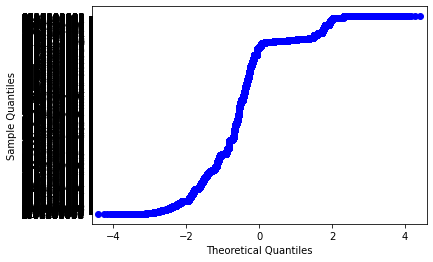

In [17]:
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
# Configuro la semilla aleatoria
seed(1993)
# Genero 100 muestras
distribucion_generada = randn(1000)
TARIFFCODE = df_pre['TARIFF.CODE']
# Represento el Q-Q plot
qqplot(TARIFFCODE)
plt.show()


c:\Users\jenni\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


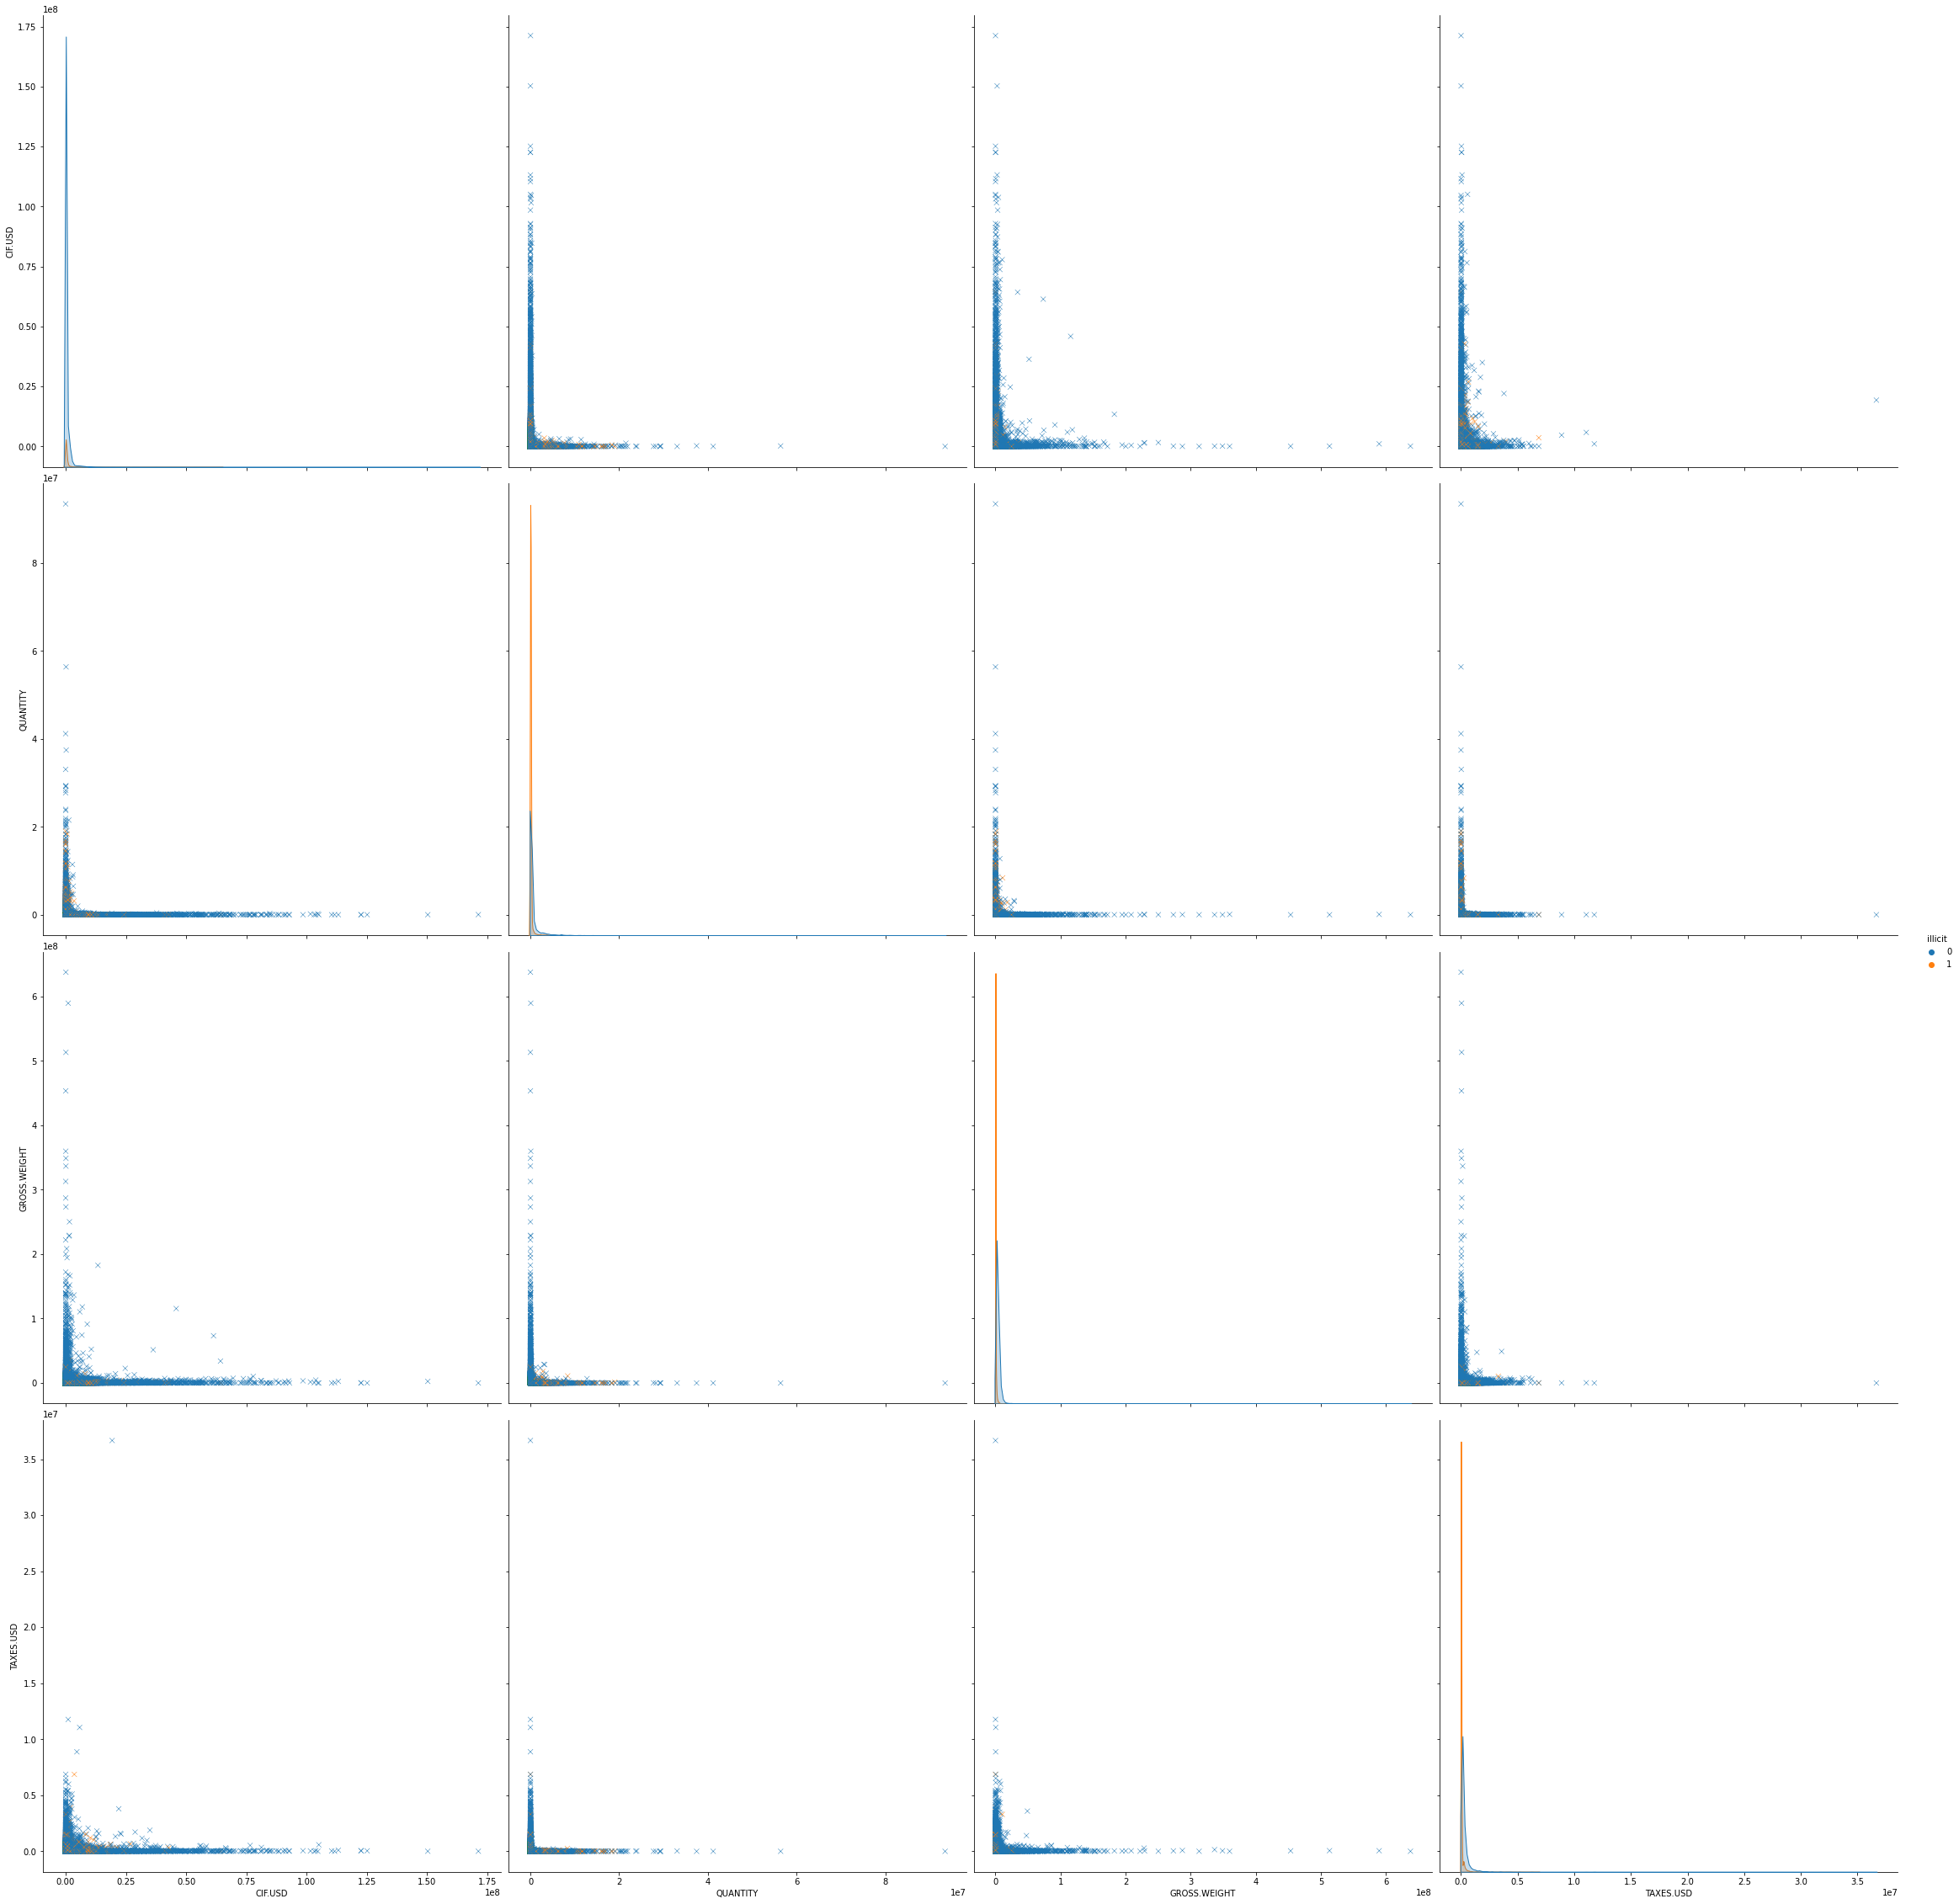

In [18]:
sns.pairplot(df_pre, hue = 'illicit' , markers='x', size=8)

In [19]:
# 1- Iniciamos análisis reduciendo el foco en las agencias más problemáticas
crosstab = pd.crosstab( df_pre.OFFICE, df_pre.illicit).sort_values(by=1,ascending=False)
crosstab.head(20)

illicit,0,1
OFFICE,,
51,36007,1158
59,17609,813
76,5613,560
60,7220,549
40,9568,541
92,4536,467
24,2043,372
168,13965,334
23,1465,311


In [20]:
#Cuantas operaciones ilícitas registramos en nuestro dataset
total_ilic = crosstab[1].sum()
total_ilic

13900

In [21]:
df_OFFICE=df_pre.groupby('OFFICE')['illicit'].agg(['mean', 'count', 'std'])#.sort_values(by=['mean'], ascending=False)
#Para buscar los más fraudulentos, genero fraudes: mean x count (indicando la candidad de fraudes cometidos)
df_OFFICE['fraudes']=df_OFFICE['mean']*df_OFFICE['count']
#Ordenamos por cantidad de fraudes
df_OFFICE.sort_values(by='fraudes', ascending=False, inplace=True)
df_OFFICE

,mean,count,std,fraudes
OFFICE,,,,
51,0.0,37165,0.2,1158.0
59,0.0,18422,0.2,813.0
76,0.1,6173,0.3,560.0
60,0.1,7769,0.3,549.0
40,0.1,10109,0.2,541.0
...,...,...,...,...
152,0.3,244,0.4,68.0
117,0.3,237,0.4,66.0
287,0.3,250,0.4,66.0


In [22]:
topAgencias_total=df_OFFICE.sort_values(by=['fraudes'],ascending=False).head(5)
topAgencias_total #5 agencias más fraudulentas, según la total de fraudes

,mean,count,std,fraudes
OFFICE,,,,
51,0.0,37165,0.2,1158.0
59,0.0,18422,0.2,813.0
76,0.1,6173,0.3,560.0
60,0.1,7769,0.3,549.0
40,0.1,10109,0.2,541.0


In [23]:
#Enfocandonos en 5 agencias, estamos trabajando con el 26% de los fraudes de nuestro dataset
topAgencias_total['fraudes'].sum()/total_ilic

0.26050359712230214

In [24]:
topAgencias_mean=df_OFFICE.sort_values(by=['mean'],ascending=False).head(5)
topAgencias_mean #5 agencias más fraudulentas, según la media de fraudes

,mean,count,std,fraudes
OFFICE,,,,
252,0.4,237,0.5,87.0
196,0.3,284,0.5,94.0
234,0.3,224,0.5,73.0
233,0.3,245,0.5,79.0
223,0.3,272,0.5,87.0


In [25]:
topAgencias_mean['fraudes'].sum()

420.0

In [26]:
#Generamos listas de estas agencias
top5Agencias_total_list=topAgencias_total.index.tolist()
top5Agencias_total_list

['51', '59', '76', '60', '40']

In [27]:
#Generamos listas de estas agencias
top5Agencias_mean_list=topAgencias_mean.index.tolist()
top5Agencias_mean_list

['252', '196', '234', '233', '223']

In [28]:
# Nos quedamos con las 5 oficinas que tienen mas volumen/tasa de operaciones ilicitas  
#df=df.assign(CHAPTER =df['TARIFF.CODE'].str[0:2]) #Dejamos esto para el próximo paso de análisis, paso 2
df_OFFICE_corrupt_total = df_pre.loc[df_pre.OFFICE.isin(top5Agencias_total_list)]
df_OFFICE_corrupt_total

,year,month,day,OFFICE,IMPORTER,TARIFF.CODE,ORIGIN.CODE,CIF.USD,QUANTITY,GROSS.WEIGHT,TAXES.USD,illicit
0,2013,1,1,60,545640,8703232225,680,1727100.0,10.0,284870.0,34920.0,0
56,2013,1,1,51,165224,8703242900,680,91000.0,19400.0,137690.0,5430.0,0
57,2013,1,1,40,158220,8483200000,680,27120.0,1350.0,16920.0,339800.0,0
58,2013,1,1,51,284988,8703241128,454,1715390.0,10.0,17450.0,36330.0,0
59,2013,1,1,51,960205,8702101319,376,27500.0,10.0,16700.0,4810.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199936,2014,12,31,40,749836,8703241128,680,42040.0,143110.0,142860.0,42170.0,0
199937,2014,12,31,76,765282,8702101319,759,364530.0,310.0,18500.0,90940.0,0
199940,2014,12,31,51,171801,8452290000,680,426280.0,9430.0,4950.0,114540.0,0
199941,2014,12,31,40,396753,4010190000,709,22030.0,100.0,863280.0,471130.0,0


In [29]:
df_OFFICE_corrupt_mean = df_pre.loc[df_pre.OFFICE.isin(top5Agencias_mean_list)]
df_OFFICE_corrupt_mean

,year,month,day,OFFICE,IMPORTER,TARIFF.CODE,ORIGIN.CODE,CIF.USD,QUANTITY,GROSS.WEIGHT,TAXES.USD,illicit
218,2013,1,1,233,O14029,9032108900,615,3422070.0,275070.0,20.0,4360.0,0
563,2013,1,2,252,O18489,3926909799,264,623400.0,10.0,9030.0,120.0,1
1024,2013,1,3,234,O18902,101210001,884,1131600.0,20.0,133030.0,440.0,0
1028,2013,1,3,234,O17010,2901290009,276,1010.0,10820.0,730.0,45450.0,0
1084,2013,1,3,252,O12986,8428909099,959,1936280.0,5222850.0,680.0,160.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
198853,2014,12,26,234,O19590,8716909099,680,1400.0,55270.0,151240.0,50.0,0
198880,2014,12,26,233,O15407,807110000,618,435320.0,54930.0,1020.0,540.0,1
199193,2014,12,27,234,O11451,8708109000,123,150.0,30.0,10.0,7430.0,1
199665,2014,12,30,223,O12395,8708991000,236,457140.0,181900.0,1810.0,1330.0,0


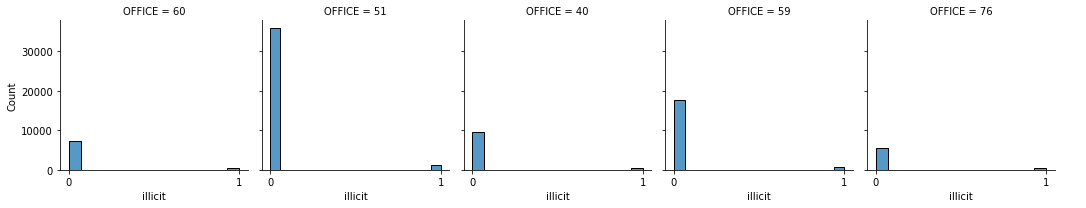

In [30]:
# Graficamos la cantidad de operaciones licitas (0) e ilícitas (1), para el volumen
g = sns.FacetGrid(df_OFFICE_corrupt_total, col='OFFICE').add_legend()
g.map_dataframe(sns.histplot, 'illicit' )
g.set(xticks=[0,1])

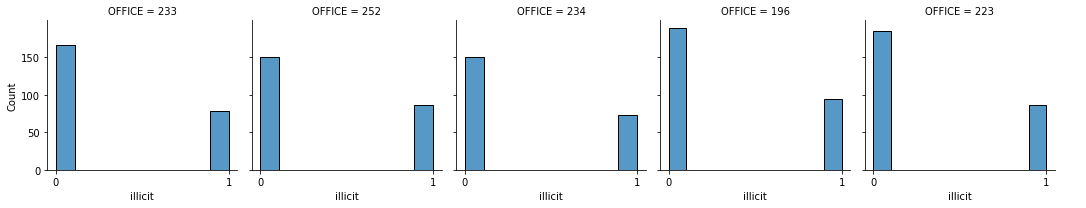

In [31]:
# Graficamos la cantidad de operaciones licitas (0) e ilícitas (1), para la tasa
g = sns.FacetGrid(df_OFFICE_corrupt_mean, col='OFFICE').add_legend()
g.map_dataframe(sns.histplot, 'illicit' )
g.set(xticks=[0,1])

In [32]:
#Reducimos los códigos tarifarios a 2, 4 dígitos (Capitulos, partidas del Sistema Armonizado (HS) de clasificación de mercaderías)
df_pre=df_pre.assign(CHAPTER = df_pre['TARIFF.CODE'].str[0:2]) #Capítulo del SA
df_pre=df_pre.assign(HEADING = df_pre['TARIFF.CODE'].str[0:4]) #Partida/Heading del SA

In [33]:
df_CHAPTER=df_pre.groupby('CHAPTER')['illicit'].agg(['mean', 'count', 'std']).sort_values(by=['mean'], ascending=False)
#Para buscar los más fraudulentos, genero fraudes: mean x count (indicando la candidad de fraudes cometidos)
df_CHAPTER['fraudes']=df_CHAPTER['mean']*df_CHAPTER['count']
#Ordenamos por cantidad de fraudes
df_CHAPTER.sort_values(by='fraudes', ascending=False, inplace=True)
df_CHAPTER

,mean,count,std,fraudes
CHAPTER,,,,
87,0.0,77070,0.2,2377.0
84,0.1,15165,0.3,1828.0
85,0.1,21118,0.2,1292.0
39,0.1,8506,0.3,688.0
73,0.1,6329,0.3,528.0
...,...,...,...,...
46,0.2,11,0.4,2.0
81,0.2,13,0.4,2.0
57,0.1,14,0.3,1.0


In [34]:
top3CHAPTER_total=df_CHAPTER.sort_values(by=['fraudes'],ascending=False).head(3)
top3CHAPTER_total #3 capitulos más fraudulentos, según total

,mean,count,std,fraudes
CHAPTER,,,,
87,0.0,77070,0.2,2377.0
84,0.1,15165,0.3,1828.0
85,0.1,21118,0.2,1292.0


In [35]:
top3CHAPTER_total['fraudes'].sum()

5497.0

In [36]:
top3CHAPTER_mean=df_CHAPTER.sort_values(by=['mean'],ascending=False).head(3)
top3CHAPTER_mean #3 capitulos más fraudulentos, según mean

,mean,count,std,fraudes
CHAPTER,,,,
78,0.4,9,0.5,4.0
26,0.4,10,0.5,4.0
92,0.3,59,0.5,20.0


In [37]:
top3CHAPTER_mean['fraudes'].sum()

28.0

In [38]:
#Generamos listas de esos capitulos
top3CHAPTER_total_list=top3CHAPTER_total.index.tolist()
top3CHAPTER_total_list

['87', '84', '85']

-> Adicionalmente, tenemos la ventaja de que estos capítulos incluyen a los automóviles, las máquinas y el material eléctrico (respectivamente). Esto nos podría llevar a encontrar variables númericas correlacionadas y distribuciones más analizables.

Buscamos relación entre las variables, usando la reducción de datos respectos a las agencias más fraudulentes y respecto a los capítulos más problemáticos.

In [39]:
#Filtramos los capitulos analizados previamente con mayor fraude, sobre la base de Top 5 de Agencias fraudentas.
df_CHAPTER_corrupt = df_OFFICE_corrupt_total[df_pre.CHAPTER.isin(top3CHAPTER_total_list)]
df_CHAPTER_corrupt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67400 entries, 0 to 199940
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          67400 non-null  object 
 1   month         67400 non-null  object 
 2   day           67400 non-null  object 
 3   OFFICE        67400 non-null  object 
 4   IMPORTER      67400 non-null  object 
 5   TARIFF.CODE   67400 non-null  object 
 6   ORIGIN.CODE   67400 non-null  object 
 7   CIF.USD       67400 non-null  float64
 8   QUANTITY      67400 non-null  float64
 9   GROSS.WEIGHT  67400 non-null  float64
 10  TAXES.USD     67400 non-null  float64
 11  illicit       67400 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 6.7+ MB


C:\Users\jenni\AppData\Local\Temp/ipykernel_26256/2836899048.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_CHAPTER_corrupt = df_OFFICE_corrupt_total[df_pre.CHAPTER.isin(top3CHAPTER_total_list)]


In [40]:
#Filtramos variables numéricas
numeric=['CIF.USD', 'QUANTITY', 'GROSS.WEIGHT', 'TAXES.USD','illicit']

numeric_df_CHAPTER_corrupt = df_CHAPTER_corrupt[numeric]
numeric_df_CHAPTER_corrupt.head()

,CIF.USD,QUANTITY,GROSS.WEIGHT,TAXES.USD,illicit
0,1727100.0,10.0,284870.0,34920.0,0
56,91000.0,19400.0,137690.0,5430.0,0
57,27120.0,1350.0,16920.0,339800.0,0
58,1715390.0,10.0,17450.0,36330.0,0
59,27500.0,10.0,16700.0,4810.0,0


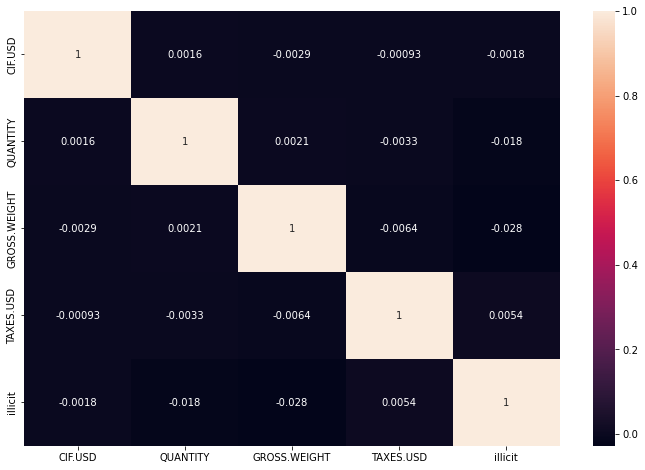

In [41]:
#Correlaciones de pearson
plt.figure(figsize=(12, 8))

vg_corr = numeric_df_CHAPTER_corrupt.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [42]:
#probamos agruparlas por actividades ilicitas con la suma total, sacando la correlacion de pearson
df_mask=df_CHAPTER_corrupt['illicit']==1
numeric1=['CIF.USD', 'QUANTITY', 'GROSS.WEIGHT', 'TAXES.USD','OFFICE']
df_CHAPTER_corrupt_num_mask=df_CHAPTER_corrupt[df_mask]
df_CHAPTER_corrupt_num=df_CHAPTER_corrupt_num_mask[numeric1]
df_CHAPTER_corrupt_num.groupby(["OFFICE"]).sum()

,CIF.USD,QUANTITY,GROSS.WEIGHT,TAXES.USD
OFFICE,,,,
40,308545330.0,3471800.0,219217780.0,20937446.0
51,628970700.0,7607970.0,860283280.0,57448699.0
59,455343080.0,4944060.0,452721020.0,35247900.0
60,302603840.0,2738190.0,149727860.0,21641845.0
76,241108930.0,2697510.0,160953600.0,18271251.0


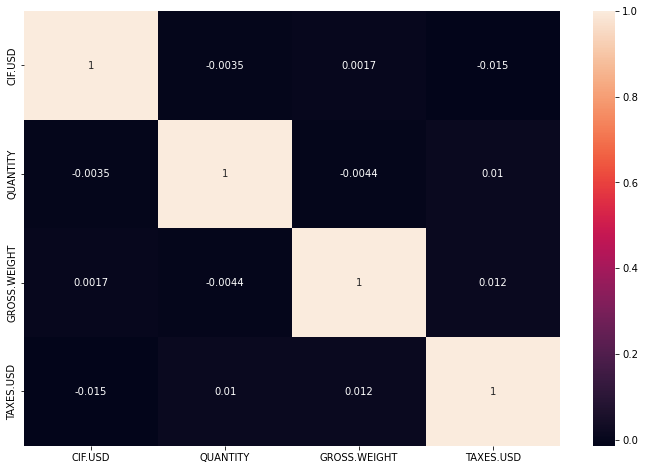

In [43]:
#Correlaciones de pearson
plt.figure(figsize=(12, 8))

vg_corr = df_CHAPTER_corrupt_num.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

c:\Users\jenni\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


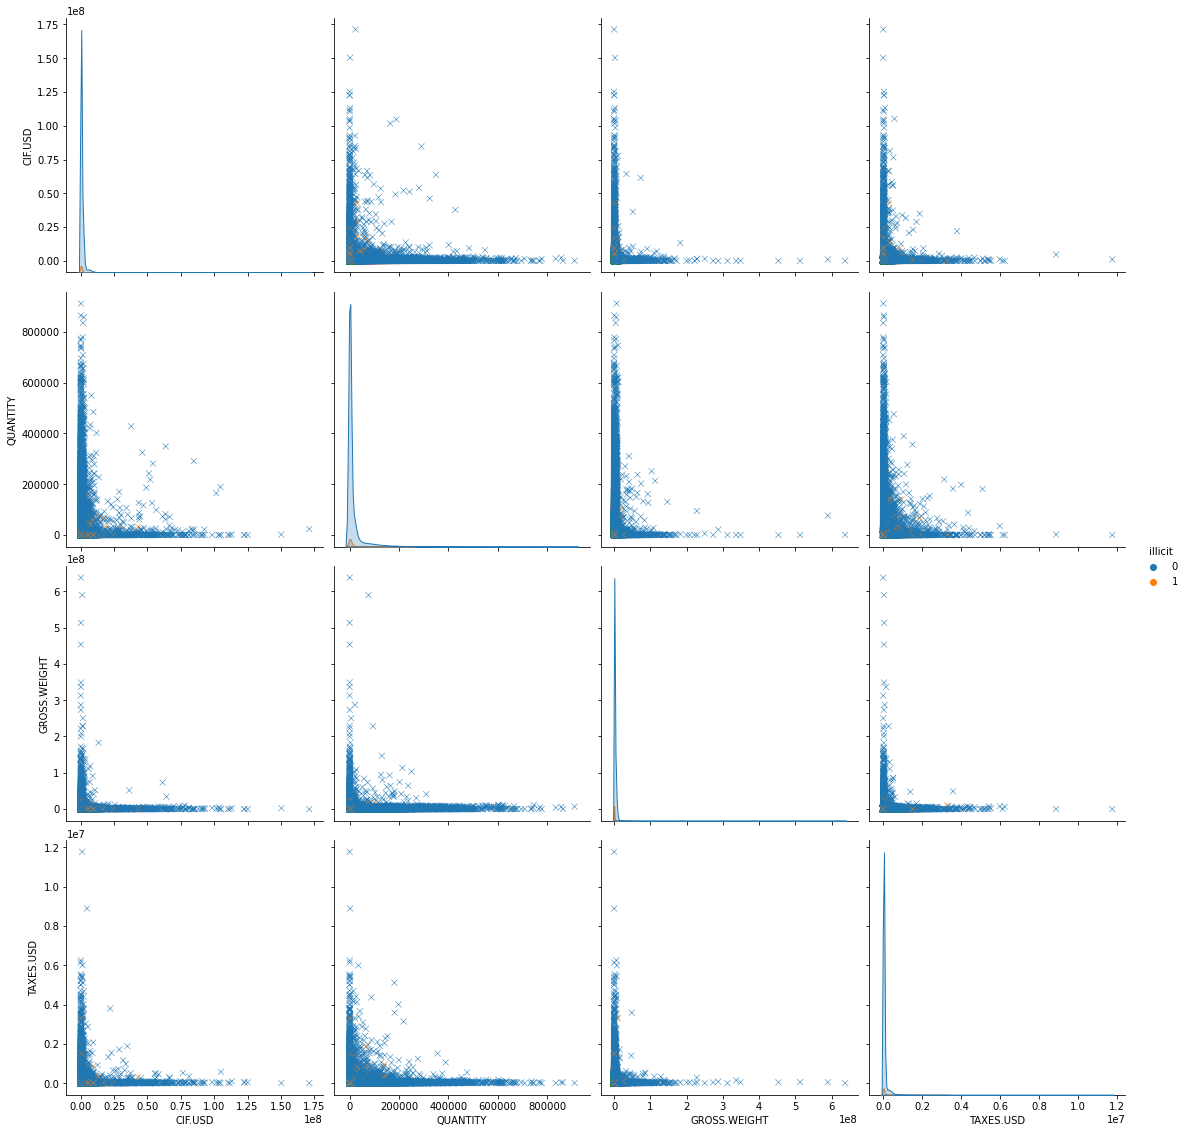

In [44]:
#Pairplot 
sns.pairplot(numeric_df_CHAPTER_corrupt, hue = 'illicit' , markers='x', size=4)

-> Seguimos sin notar correlaciones entre las variables numéticas del dataset, incluso reduciendo el universo de mercaderias a capítulos "tecnológicos" (automóviles, las máquinas y el material eléctrico).

In [45]:
numeric2=['CIF.USD', 'QUANTITY', 'GROSS.WEIGHT', 'TAXES.USD','OFFICE','illicit']
df_CHAPTER_corrupt_numeric_of=df_CHAPTER_corrupt[numeric2]

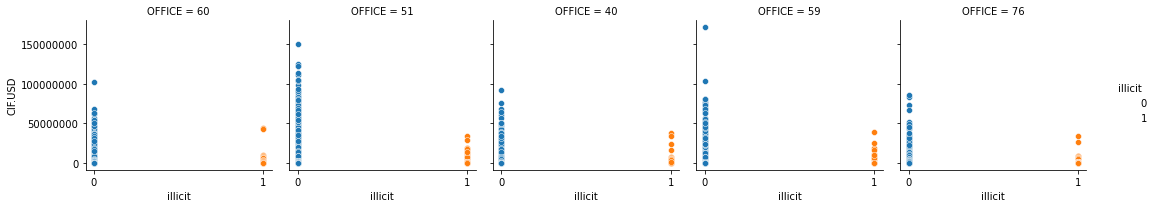

In [46]:
# Buscamos graficar con FacetGrid las distribuciones de las variables numéricas, según sean operaciones licitas (0) e ilícitas (1)
# Graficamos la cantidad de operaciones licitas (0) e ilícitas (1)

g = sns.FacetGrid(df_CHAPTER_corrupt_numeric_of, col='OFFICE', hue='illicit').add_legend()
g.map_dataframe(sns.scatterplot, y='CIF.USD',  x='illicit')
g.set(xticks=[0,1])
plt.ticklabel_format(style='plain', axis='y') #Eliminamos al notación cientifica.

array([[<AxesSubplot:title={'center':'CIF.USD'}>,
        <AxesSubplot:title={'center':'QUANTITY'}>],
       [<AxesSubplot:title={'center':'GROSS.WEIGHT'}>,
        <AxesSubplot:title={'center':'TAXES.USD'}>],
       [<AxesSubplot:title={'center':'illicit'}>, <AxesSubplot:>]],
      dtype=object)

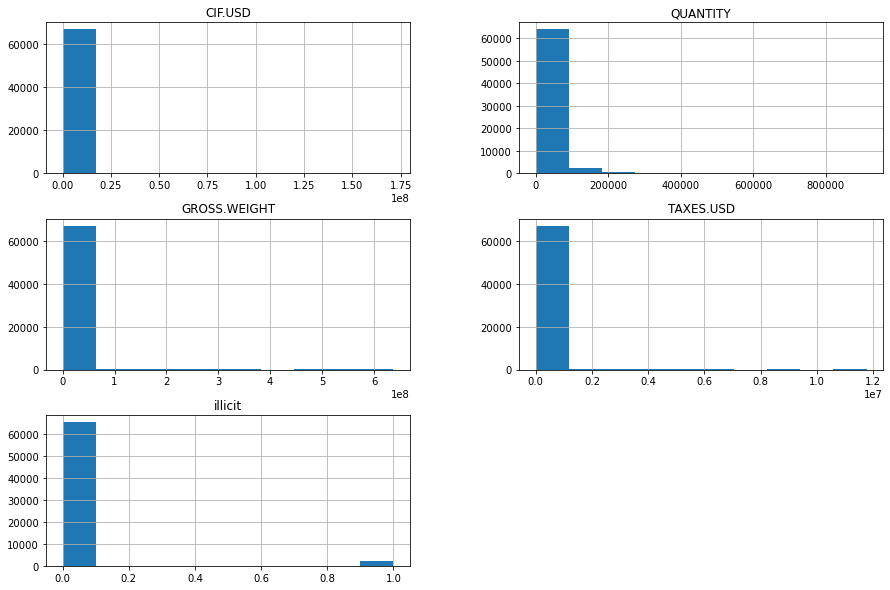

In [47]:
%matplotlib inline
numeric_df_CHAPTER_corrupt.hist(figsize=(15,10))

array([[<AxesSubplot:title={'center':'CIF.USD'}>,
        <AxesSubplot:title={'center':'QUANTITY'}>],
       [<AxesSubplot:title={'center':'GROSS.WEIGHT'}>,
        <AxesSubplot:title={'center':'TAXES.USD'}>],
       [<AxesSubplot:title={'center':'illicit'}>, <AxesSubplot:>]],
      dtype=object)

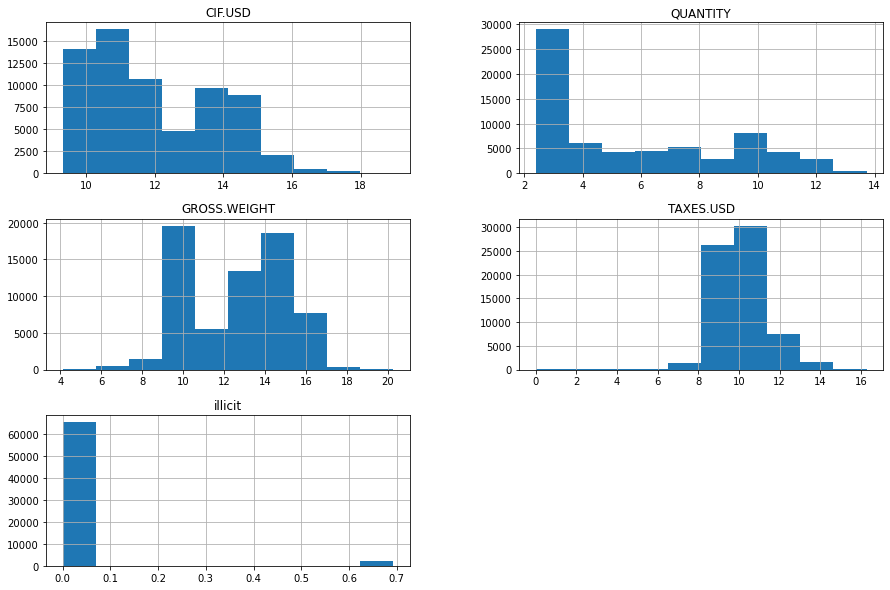

In [48]:
#Aplicamos transformación log para "suavizar" las distribuciones

numeric_log_df_CHAPTER_corrupt = np.log(numeric_df_CHAPTER_corrupt + 1)
numeric_log_df_CHAPTER_corrupt.hist(figsize=(15,10))

c:\Users\jenni\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


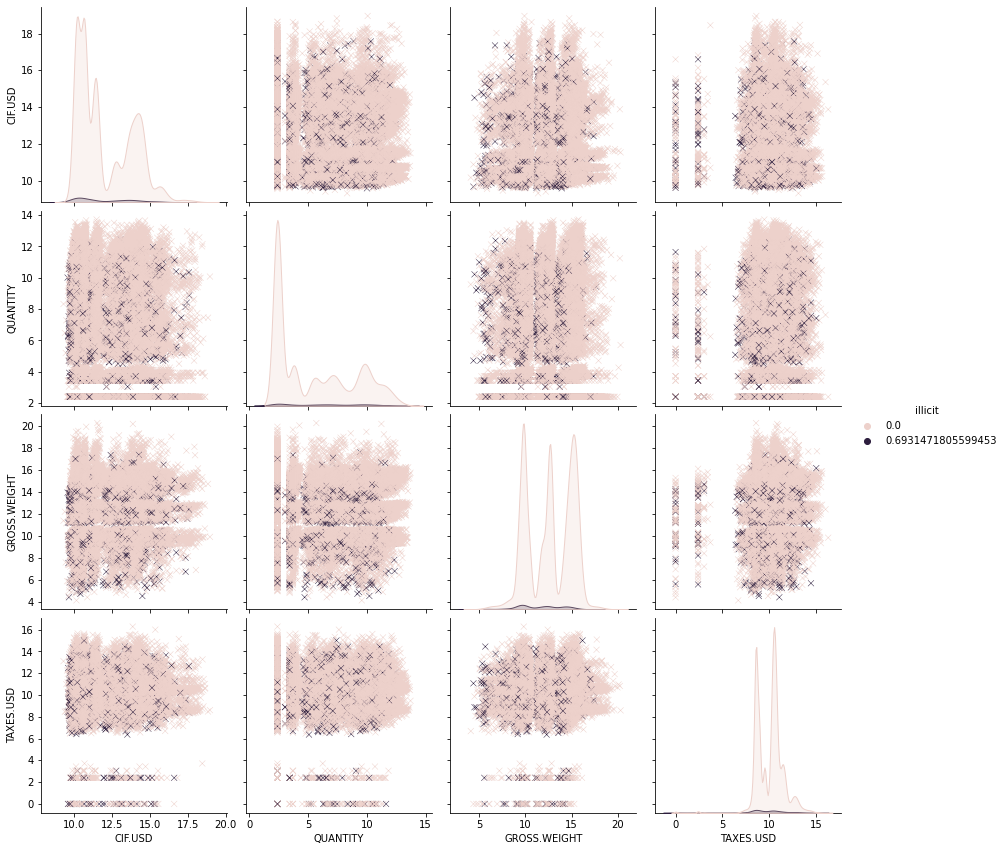

In [49]:
#Pairplot 
sns.pairplot(numeric_log_df_CHAPTER_corrupt, hue = 'illicit' , markers='x', size=3)

In [50]:
# La referencia de ilicitos pasó a ser entre 0 y 0,7 producto de la transformación logarítmica
numeric_log_df_CHAPTER_corrupt.describe()

,CIF.USD,QUANTITY,GROSS.WEIGHT,TAXES.USD,illicit
count,67400.0,67400.0,67400.0,67400.0,67400.0
mean,12.0,5.5,12.6,10.0,0.0
std,1.8,3.3,2.4,1.4,0.1
min,9.3,2.4,4.1,0.0,0.0
25%,10.6,2.4,9.9,8.7,0.0
50%,11.4,3.9,12.7,10.3,0.0
75%,13.7,8.7,14.9,10.7,0.0
max,19.0,13.7,20.3,16.3,0.7


In [51]:
#Ploteamos de forma separada las operaciones lícitas e ilícitas para tener una mejor visualización.
caso_07 = numeric_log_df_CHAPTER_corrupt['illicit']>0
numeric_log_df_CHAPTER_only_corrupt = numeric_log_df_CHAPTER_corrupt[caso_07]
numeric_log_df_CHAPTER_only_corrupt

,CIF.USD,QUANTITY,GROSS.WEIGHT,TAXES.USD,illicit
327,10.2,2.4,14.5,10.2,0.7
328,13.4,7.2,10.2,9.3,0.7
360,14.0,2.4,12.4,11.3,0.7
372,11.4,5.6,8.7,10.1,0.7
529,10.6,5.9,9.8,7.8,0.7
...,...,...,...,...,...
199646,9.8,5.7,10.0,8.9,0.7
199899,13.9,2.4,12.3,8.4,0.7
199924,9.7,9.1,13.2,11.1,0.7
199932,11.0,2.4,14.1,10.3,0.7


c:\Users\jenni\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


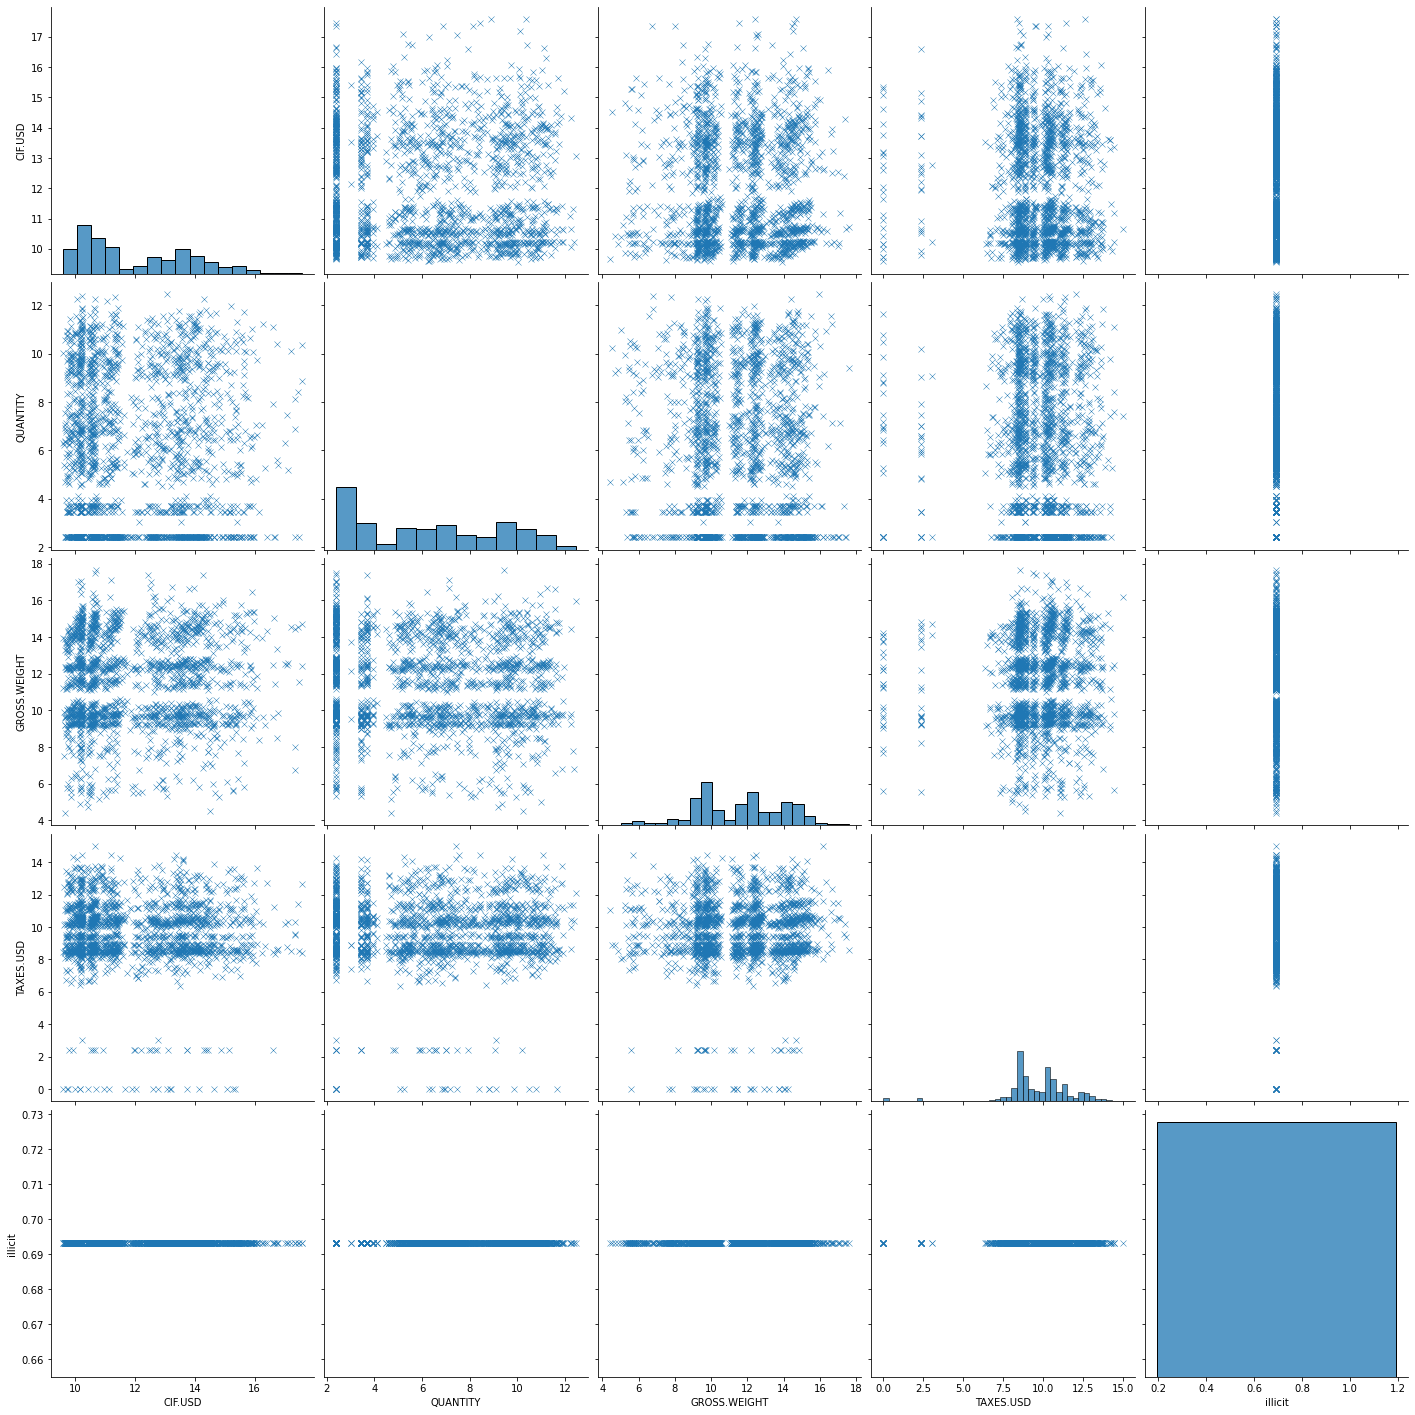

In [52]:
#Graficamos solo las operaciones corruptas
sns.pairplot(numeric_log_df_CHAPTER_only_corrupt, markers='x', size=4)

In [53]:
#Graficamos solo las operaciones NO corruptascaso_07 = numeric_log_df_CHAPTER_corrupt['illicit']>0
caso_0 = numeric_log_df_CHAPTER_corrupt['illicit']==0
numeric_log_df_CHAPTER_not_corrupt = numeric_log_df_CHAPTER_corrupt[caso_0]
numeric_log_df_CHAPTER_not_corrupt

,CIF.USD,QUANTITY,GROSS.WEIGHT,TAXES.USD,illicit
0,14.4,2.4,12.6,10.5,0.0
56,11.4,9.9,11.8,8.6,0.0
57,10.2,7.2,9.7,12.7,0.0
58,14.4,2.4,9.8,10.5,0.0
59,10.2,2.4,9.7,8.5,0.0
...,...,...,...,...,...
199931,11.4,10.7,9.7,10.0,0.0
199934,10.4,9.7,5.5,8.9,0.0
199936,10.6,11.9,11.9,10.6,0.0
199937,12.8,5.7,9.8,11.4,0.0


c:\Users\jenni\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


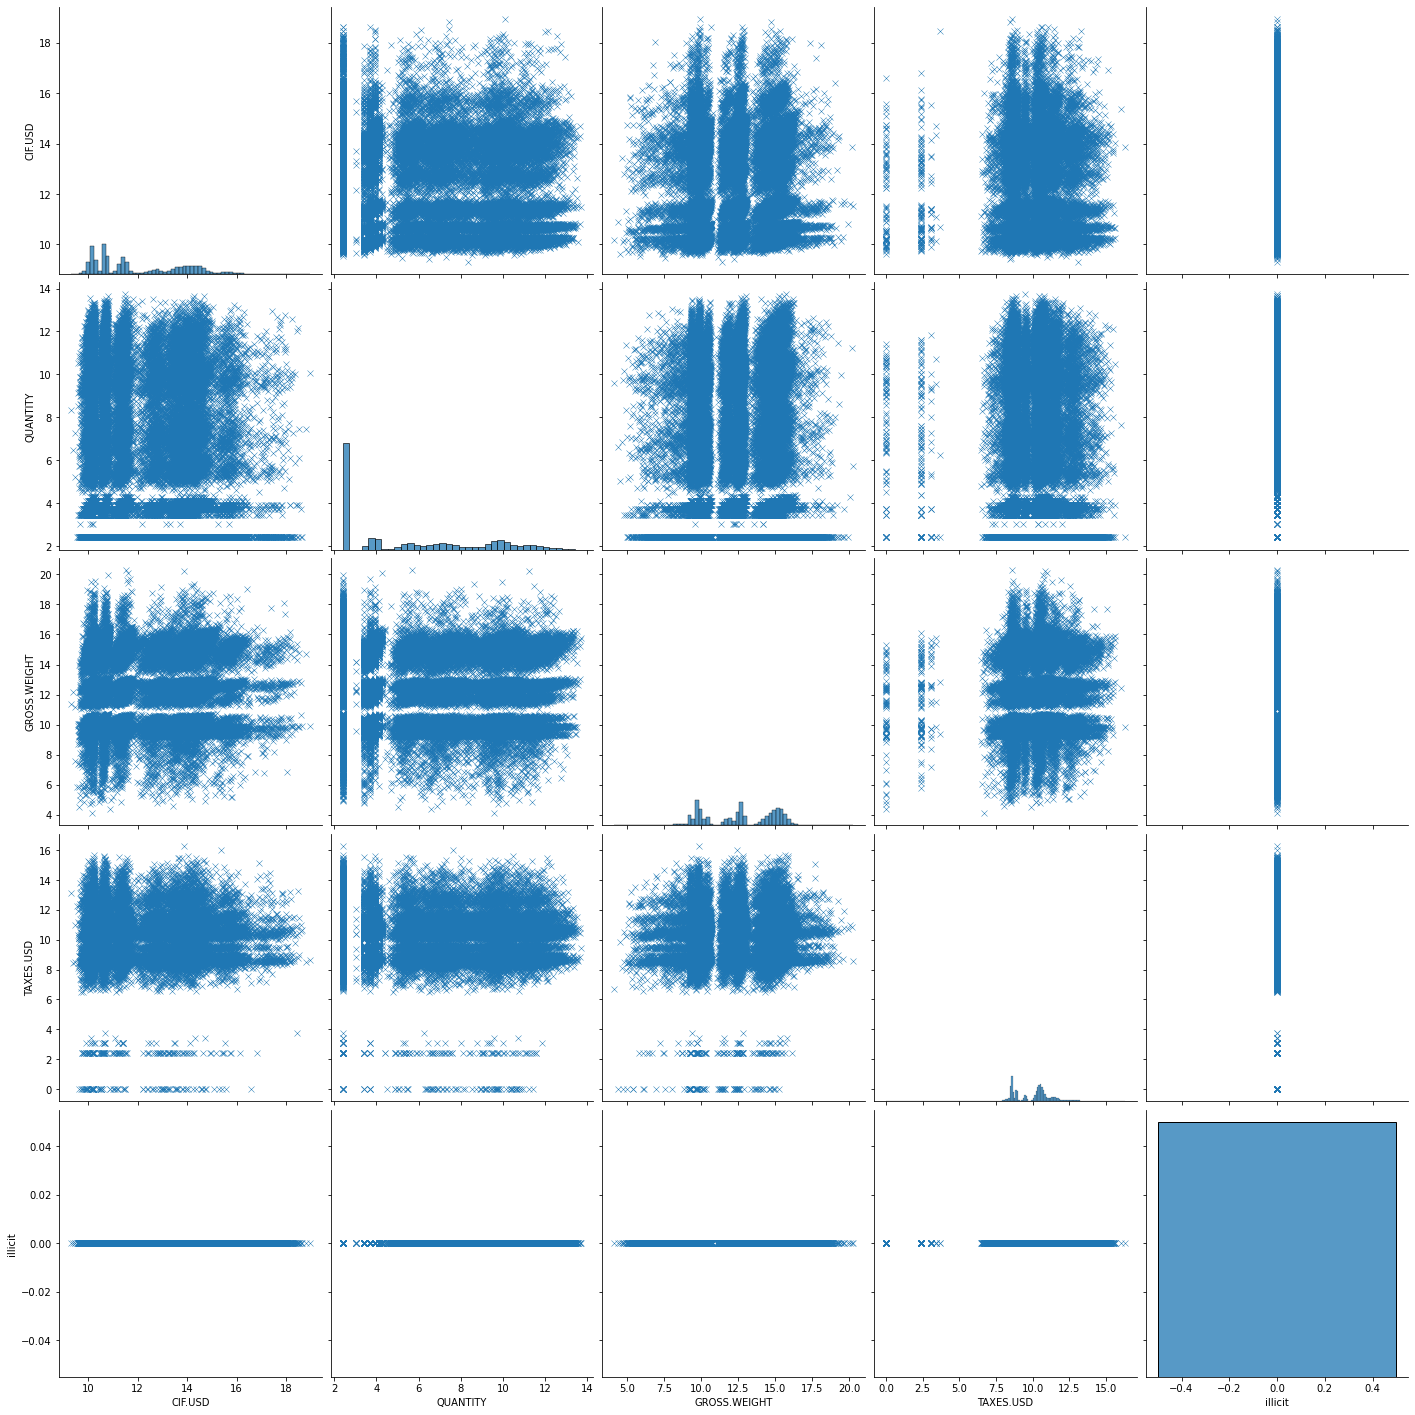

In [54]:
sns.pairplot(numeric_log_df_CHAPTER_not_corrupt, markers='x', size=4)

-> Es posible visualizar mejores distribuciones con la transformación logarítmica, incluso se observan que todas ellas son multimodales, lo que puede deberse a las diferentes mercaderías de los 3 capítulos analizados (automóviles, máquinas y material eléctrico).